In [54]:
import os
import sys
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits import mplot3d
from collections import defaultdict
plt.rcParams.update({'font.size': 13})

In [69]:
class Trajectory:
    def __init__(self, experiment):
        self.experiment = experiment
        self.goal_states = [
            [28.94, 79.0, -21.95],
            [49.76, 96.85, 36.43],
            [-45.50, 108, 1.45],
        ]
        self.initial_position = np.array([-0.5, 96. ,  1.5], dtype=np.float32)
        
        self.hist_gstate = defaultdict(int)
        
        # raw data
        self.data = self.load_data()
        # data organized by goal states
        self.data_list = self.dict2list()
        # all trajectories together
        self.data_reshaped = self.list_reshape()
        
        
        
    def load_data(self):
        data = defaultdict(list)
        for file in os.listdir(f"../results/{self.experiment}/"):
            if 'coord' in file:
                
                goal_state = int(file.split('_')[1][0])
                self.hist_gstate[goal_state] += 1
                
                with open(f"../results/{self.experiment}/{file}") as csv_file:
                    trajectory = []
                    csv_reader = csv.reader(csv_file, delimiter=',')
                    line_count = 0
                    for i, row in enumerate(csv_reader):
                        trajectory.append(row)
                data[goal_state].append(trajectory)
        return data
    
    def dict2list(self):
        return [d for d in self.data.values()]
    
    def list_reshape(self):
        return [j for d in self.data_list for j in d]
    
    
    def plot_goal_states(self, ax):
        for x,y,z in self.goal_states:
            ax.plot(x, y, z, marker='o', color='black', markersize=10)
            text = '   ' + str(x) + ', ' + str(y) + ', ' + str(z)
            ax.text(x, y, z, text)
    
    
    # PLOT HELPERS
    
    def plot_init_state(self, ax):
        x,y,z = self.initial_position
        ax.plot(x,y,z, marker='o', markersize=10)
            
    def plot_trajectory(self, traj, ax):
        d = np.array(traj, dtype=np.float32)
        ax.plot3D(d[:,0], d[:,1], d[:,2])
        
    def plot_point(self, point, ax):
        x,y,z = point
        ax.plot(x, y, z, color='blue', marker='.', markersize=1)
        
        
    def plot_list(self, traj_list, ax):
        for traj in traj_list:
            self.plot_trajectory(traj, ax)
            
    def plot_labels(self, ax):
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')
    
    def plot_standard(self, ax):
        self.plot_goal_states(ax)
        self.plot_init_state(ax)
        self.plot_labels(ax)
        
    # PLOT FUNCTIONS
    
    def plot_per_goal_state(self):
        for i, goal_state in enumerate(self.data_list):
            fig, ax = plt.subplots(figsize=(15,15))
            ax = plt.axes(projection='3d')
            for traj in goal_state:
                self.plot_trajectory(traj, ax)
            
            self.plot_standard(ax)

            
    def plot_all_together(self):
        fig, ax = plt.subplots(figsize=(15,15))
        ax = plt.axes(projection='3d')
        for traj in self.data_reshaped:
            self.plot_trajectory(traj, ax)
            
        self.plot_standard(ax)
        
    def plot_pointcloud(self):
        fig, ax = plt.subplots(figsize=(15,15))
        ax = plt.axes(projection='3d')
        for traj in self.data_reshaped:
            traj = np.array(traj, dtype=np.float32)
            for point in traj:
                self.plot_point(point, ax)

        self.plot_standard(ax)
    

## Example plot / goal_state

In [56]:
experiment = 'ed8c06ff3eb433f78f31b4c41b5101571c510aa2-884ba00d-59d8e157'

t = Trajectory(experiment)


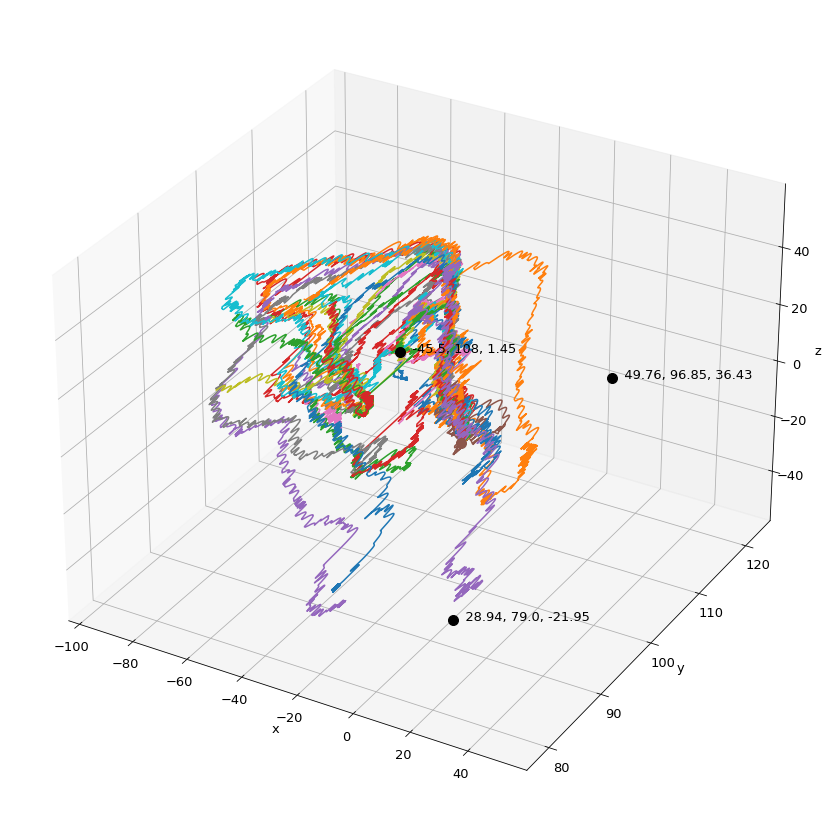

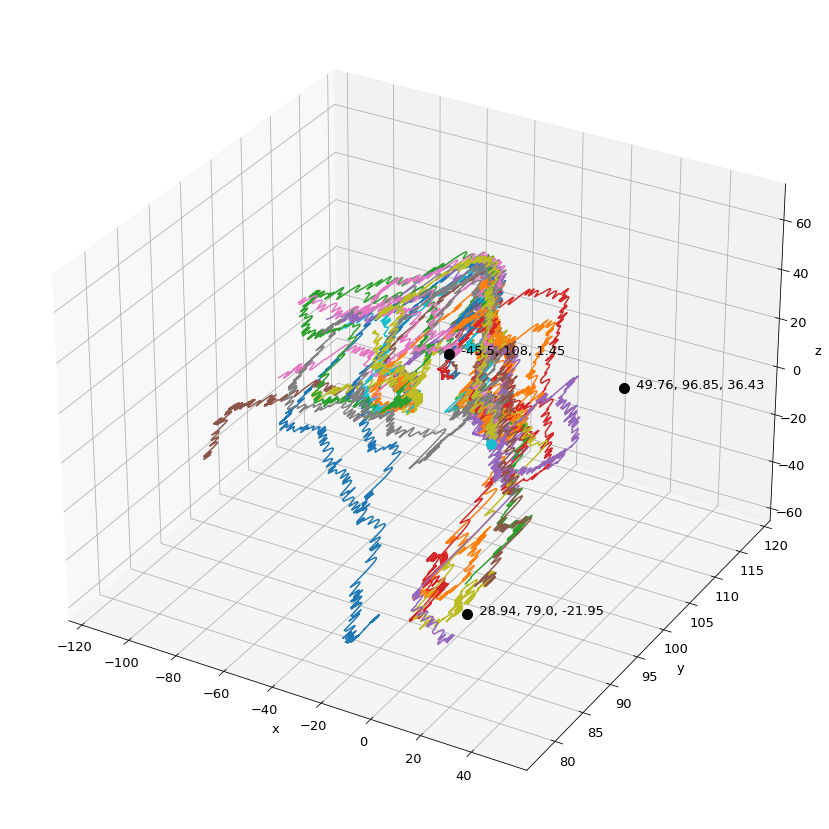

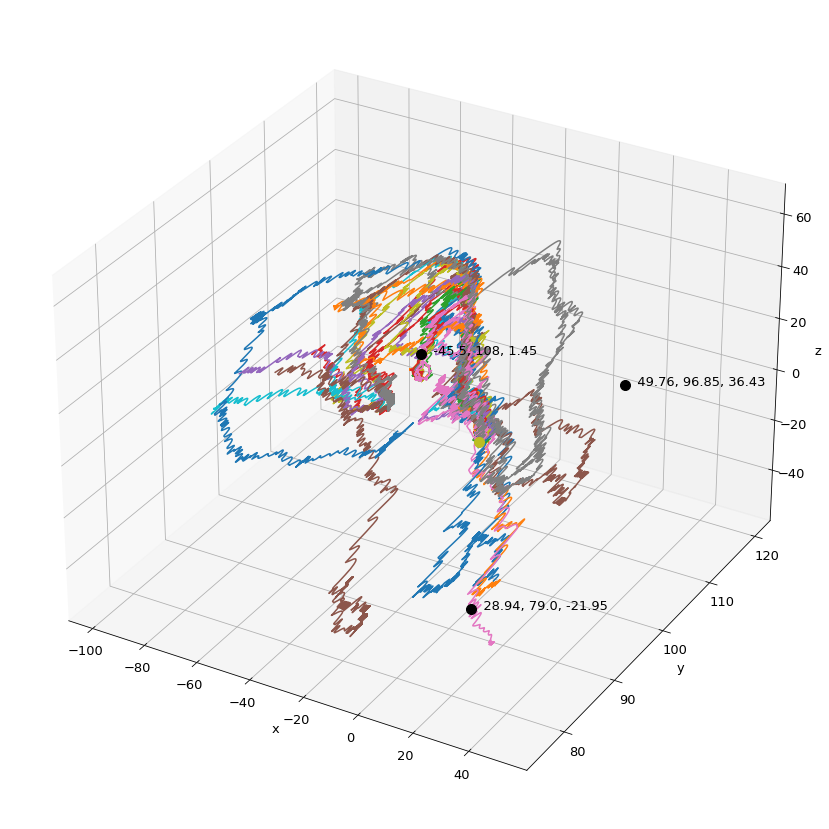

In [57]:
t.plot_per_goal_state()

## Example plot all together

In [61]:
experiment = 'ed8c06ff3eb433f78f31b4c41b5101571c510aa2-dd73ff79-50ea45d3'

t = Trajectory(experiment)


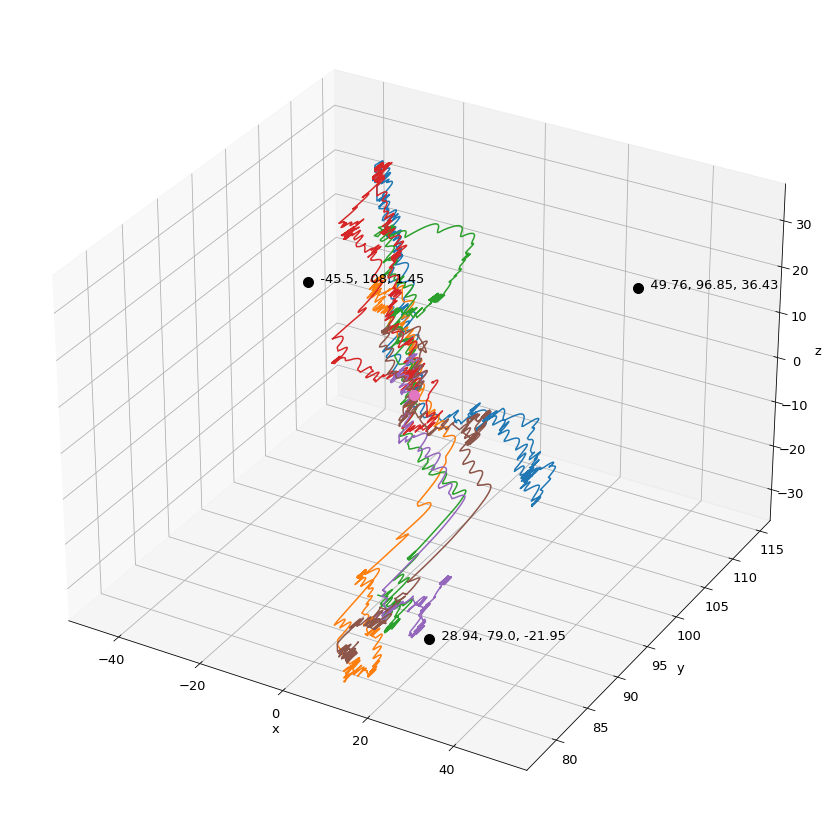

In [62]:
t.plot_all_together()

## Example point cloud

In [70]:
experiment = 'ed8c06ff3eb433f78f31b4c41b5101571c510aa2-dd73ff79-50ea45d3'

t = Trajectory(experiment)


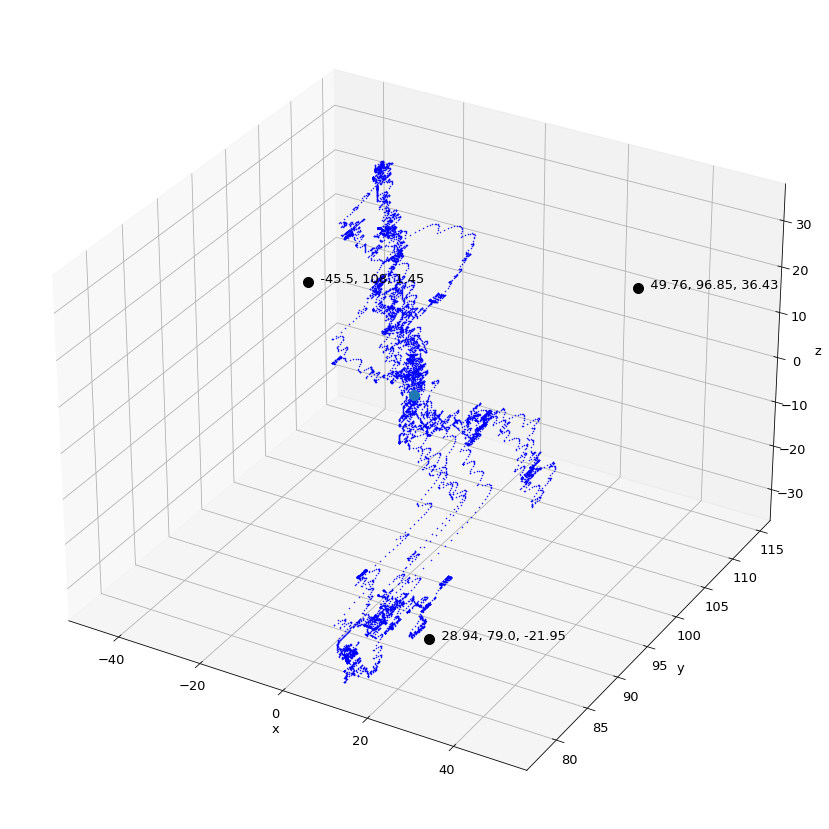

In [71]:
t.plot_pointcloud()